In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [60]:
from src.data_generator import *
from src.model import *
import numpy as np
import matplotlib.pyplot as plt

In [72]:
X = SemiMartingale(X_0=1.0, vol=3.0)

In [73]:
x = X.generate(100000, 100)
model = FFNetwork(n_layers = 2)

In [74]:
lossf = MMDLoss()

In [75]:
model._add_loss(lossf)

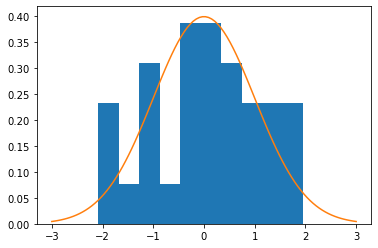

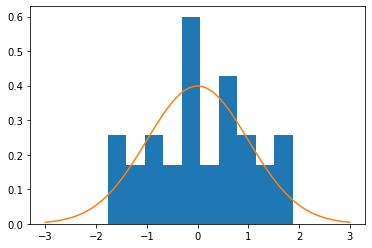

In [ ]:
model.train(x, num_epochs=5, batch_size=32)

In [ ]:
x

In [ ]:
iv = model(x).numpy()
iv = iv.squeeze()
z = (x[:,-1] - x[:,0])/np.sqrt(iv)

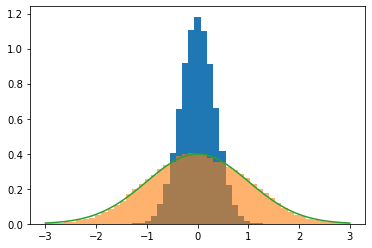

In [69]:
from scipy.stats import norm

true_iv = X.integrated_variance()
tt = np.linspace(-3.0, 3.0, 100)
plt.hist(X.get_norm_increments(), bins=np.linspace(-3,3,50), density=True)
plt.hist(z, bins=np.linspace(-3,3,50), alpha=0.6, density=True)
plt.plot(x, norm.pdf(tt, 0.0, 1.0))
plt.show()

In [25]:
np.mean(iv)
#plt.hist(iv, bins = 20)

6.392760936909111

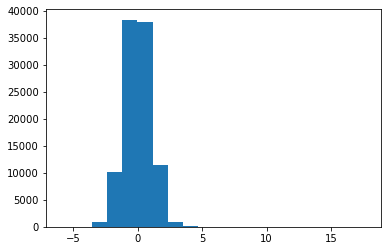

In [22]:
plt.hist(z, bins=20)
plt.show()

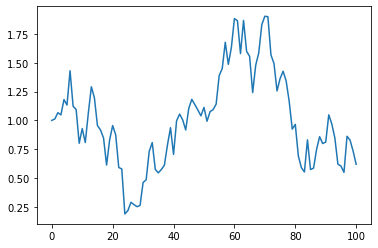

In [281]:
plt.plot(x[2,:])

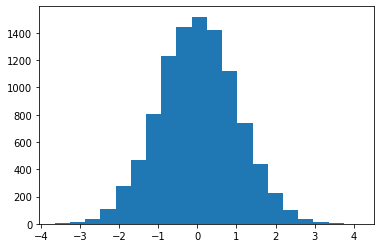

In [15]:
loss = MMDLoss()
x = X.get_total_increments()
sig = X.integrated_variance()
#loss(tf.constant(x), tf.constant(sig))
import matplotlib.pyplot as plt
plt.hist(x/np.sqrt(sig), bins=20)
plt.show()

In [24]:
model = FFNetwork(n_layers=3, h_dims=32)

[autoreload of src.model failed: Traceback (most recent call last):
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 450, in superreload
    update_generic(old_obj, new_obj)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 342, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 387, in update_generic
    update(a, b)
  File "/home/phillipm/anaconda3/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 266, in update_function
    setattr(old, name, getattr(new,

TypeError: super(type, obj): obj must be an instance or subtype of type

In [6]:
model = FFNetwork(n_layers =4)

In [7]:
model(x)

<tf.Tensor: id=136, shape=(1, 1), dtype=float64, numpy=array([[0.53113505]])>

In [8]:
model.summary()

Model: "ff_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  6528      
_________________________________________________________________
dense_1 (Dense)              multiple                  4160      
_________________________________________________________________
dense_2 (Dense)              multiple                  4160      
_________________________________________________________________
dense_3 (Dense)              multiple                  4160      
_________________________________________________________________
dense_4 (Dense)              multiple                  65        
Total params: 19,073
Trainable params: 19,073
Non-trainable params: 0
_________________________________________________________________


In [136]:
loss1 = MomentLoss(weights = None, degree=10)
loss2 = MomentLoss(weights = 'exponential', degree=10)
loss3 = MomentLoss(weights = 'factorial', degree=10)

In [137]:
print(loss1(inc, int_var))
print(loss2(inc, int_var))
print(loss3(inc, int_var))

tf.Tensor(1033.9674, shape=(), dtype=float32)
tf.Tensor(0.05526517, shape=(), dtype=float32)
tf.Tensor(0.00091985625, shape=(), dtype=float32)


In [171]:
loss = MMDLoss(kernel = 'rbf', length_scale=2.0)

In [337]:
def f():
    x = None
    y = 1.0
    return x, y

In [394]:
!conda install -c conda-forge ipywidgets
!jupyter nbextension enable --py widgetsnbextension

'conda' is not recognized as an internal or external command,
operable program or batch file.
Traceback (most recent call last):
  File "C:\Users\phillip\anaconda3\envs\tf\Scripts\jupyter-nbextension-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\notebook\nbextensions.py", line 983, in start
    super(NBExtensionApp, self).start()
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\jupyter_core\application.py", line 259, in start
    self.subapp.start()
  File "C:\Users\phillip\anaconda3\envs\tf\lib\site-packages\notebook\nbextensions.py", line 891, in start
    self.toggle_nbextension